<a href="https://colab.research.google.com/github/coniecakes/BI_Map/blob/main/ITEC_600_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project for ITEC 600
## Building a fraud alert detector


### EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import Data and check for missing values

In [3]:
# upload data set
data = pd.read_csv('/content/drive/MyDrive/Colab Projects/card_transdata.csv')

# calculate missing values that need to be addressed
missing_values = data.isna().sum()

# check for na values
if missing_values.any():
  print('There are some missing values here, you better work on that.')
else:
  print('Hooray, there are no missing values!')

Hooray, there are no missing values!


After importing our data, we can begin basic EDA

In [ ]:
### Basic EDA so we can get a sense of the Data Structure
# Prints top 20 rows
print(data.head(20))

# Gives Variable names and null counts
print(data.info())

#Gives Basic stats on the data, specifically: min, max, mean, and std
print(data.describe())


    distance_from_home  distance_from_last_transaction  \
0            57.877857                        0.311140   
1            10.829943                        0.175592   
2             5.091079                        0.805153   
3             2.247564                        5.600044   
4            44.190936                        0.566486   
5             5.586408                       13.261073   
6             3.724019                        0.956838   
7             4.848247                        0.320735   
8             0.876632                        2.503609   
9             8.839047                        2.970512   
10           14.263530                        0.158758   
11           13.592368                        0.240540   
12          765.282559                        0.371562   
13            2.131956                       56.372401   
14           13.955972                        0.271522   
15          179.665148                        0.120920   
16          11

After a descriptive EDA, It's always nice to have some Visual EDA

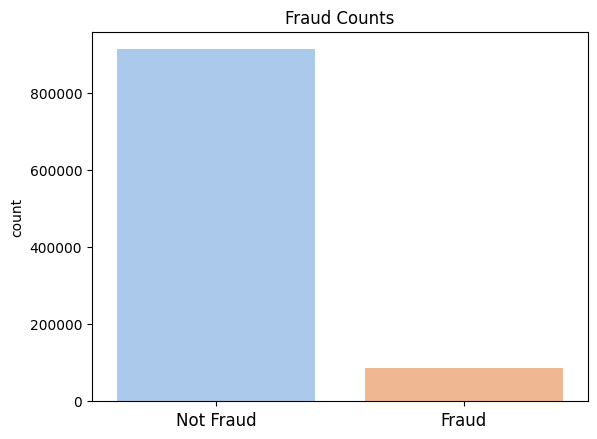

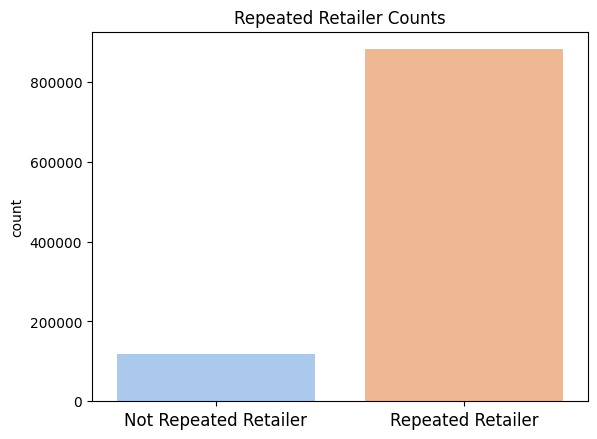

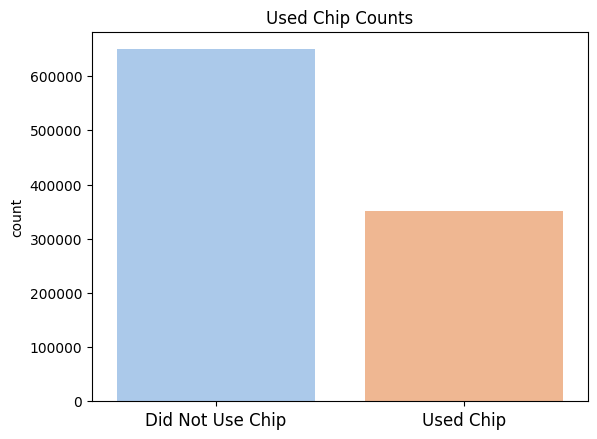

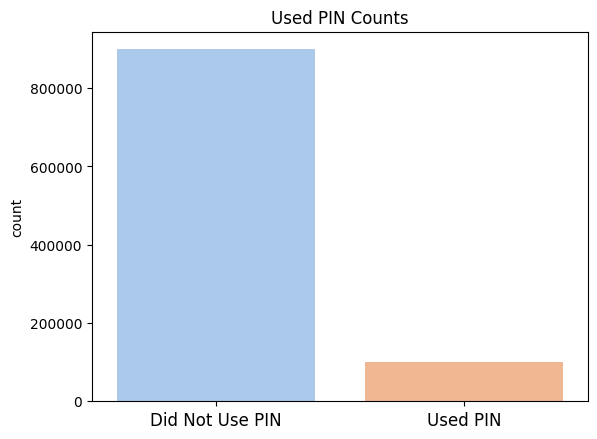

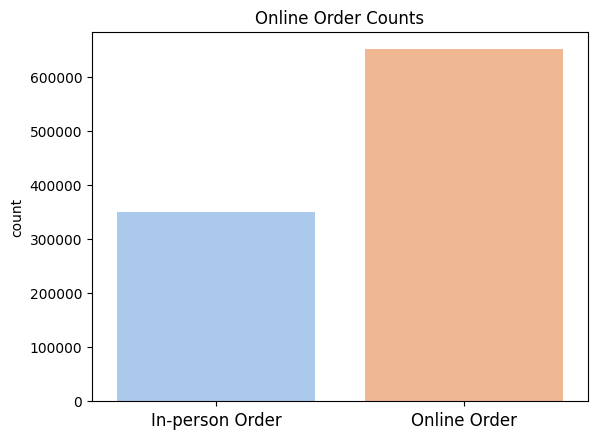

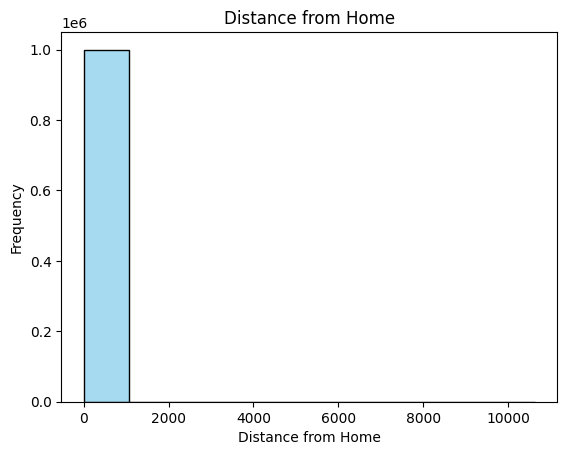

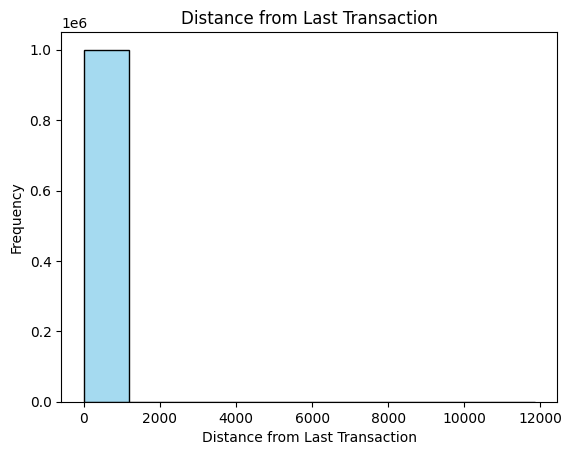

Text(0.5, 1.0, 'Ratio to Median Purchase Price')

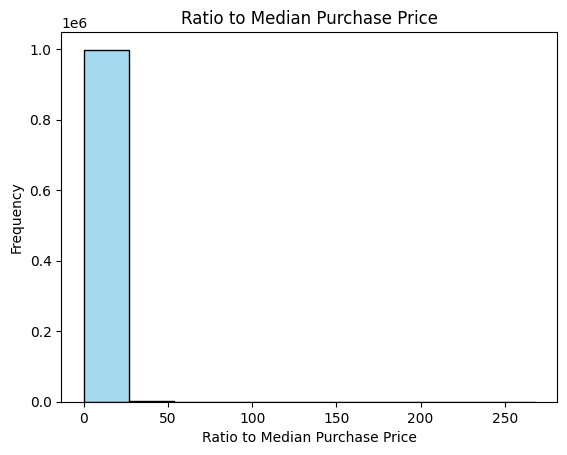

In [ ]:
### Visual EDA

# Our Y/Independant variable, Fraud
## 1 means there was a fraud, 0, means there was not
ax = sns.countplot(x='fraud', data=data, palette='pastel', hue='fraud', legend=False)
new_labels = ['Not Fraud', 'Fraud']
ax.set_xticks([0, 1])
ax.set_xticklabels(new_labels, fontsize=12, rotation=0)
ax.set_xlabel('')
plt.title('Fraud Counts')
plt.show()

# Our X Categorical Variables
ax = sns.countplot(x='repeat_retailer', data=data, palette='pastel', hue='repeat_retailer', legend=False)
new_labels = ['Not Repeated Retailer', 'Repeated Retailer']
ax.set_xticks([0, 1])
ax.set_xticklabels(new_labels, fontsize=12, rotation=0)
ax.set_xlabel('')
plt.title('Repeated Retailer Counts')
plt.show()

ax = sns.countplot(x='used_chip', data=data, palette='pastel', hue='used_chip', legend=False)
new_labels = ['Did Not Use Chip', 'Used Chip']
ax.set_xticks([0, 1])
ax.set_xticklabels(new_labels, fontsize=12, rotation=0)
ax.set_xlabel('')
plt.title('Used Chip Counts')
plt.show()

ax = sns.countplot(x='used_pin_number', data=data, palette='pastel', hue='used_pin_number', legend=False)
new_labels = ['Did Not Use PIN', 'Used PIN']
ax.set_xticks([0, 1])
ax.set_xticklabels(new_labels, fontsize=12, rotation=0)
ax.set_xlabel('')
plt.title('Used PIN Counts')
plt.show()

ax = sns.countplot(x='online_order', data=data, palette='pastel', hue='online_order', legend=False)
new_labels = ['In-person Order','Online Order']
ax.set_xticks([0, 1])
ax.set_xticklabels(new_labels, fontsize=12, rotation=0)
ax.set_xlabel('')
plt.title('Online Order Counts')
plt.show()


# Our X Continous Variables
sns.histplot(data['distance_from_home'], bins=10, kde=False, color='skyblue')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.title('Distance from Home')
plt.show()

sns.histplot(data['distance_from_last_transaction'], bins=10, kde=False, color='skyblue')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Frequency')
plt.title('Distance from Last Transaction')
plt.show()

sns.histplot(data['ratio_to_median_purchase_price'], bins=10, kde=False, color='skyblue')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Frequency')
plt.title('Ratio to Median Purchase Price')




After checking for missing values, begin model construction

### Random Forest Model

In [4]:
# import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [16]:
# separate target variable column from data set
X = data.drop('fraud', axis=1)
y = data['fraud']
random_value = 42

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_value, stratify=y)

In [17]:
# use random forest to build model
rfModel1 = RandomForestClassifier(n_estimators=100, random_state=random_value)
rfModel1.fit(X_train, y_train)

# make predictions
rf1_y_pred = rfModel1.predict(X_test)

In [18]:
# test the model
rf1_accuracy = accuracy_score(y_test, rf1_y_pred)
rf1_precision = precision_score(y_test, rf1_y_pred)
rf1_recall = recall_score(y_test, rf1_y_pred)
rf1_f1 = f1_score(y_test, rf1_y_pred)
print(f'Accuracy: {rf1_accuracy}')
print(f'Precision: {rf1_precision}')
print(f'Recall: {rf1_recall}')
print(f'F1 Score: {rf1_f1}')
rf1_report = classification_report(y_test, rf1_y_pred)
print(rf1_report)

Accuracy: 0.9999833333333333
Precision: 1.0
Recall: 0.9998093131459517
F1 Score: 0.99990464748174
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



### Naive Bayes Model

In [19]:
# import necessary packages
from sklearn.naive_bayes import GaussianNB

In [20]:
# build an NB model
nbModel1 = GaussianNB()
nbModel1.fit(X_train, y_train)

# make predictions
nb1_y_pred = nbModel1.predict(X_test)

In [21]:
# test the model
nb1_accuracy = accuracy_score(y_test, nb1_y_pred)
nb1_precision = precision_score(y_test, nb1_y_pred)
nb1_recall = recall_score(y_test, nb1_y_pred)
nb1_f1 = f1_score(y_test, nb1_y_pred)
print(f'Accuracy: {nb1_accuracy}')
print(f'Precision: {nb1_precision}')
print(f'Recall: {nb1_recall}')
print(f'F1 Score: {nb1_f1}')
nb1_report = classification_report(y_test, nb1_y_pred)
print(nb1_report)

Accuracy: 0.9509866666666666
Precision: 0.7945674970586731
Recall: 0.5923877807863925
F1 Score: 0.6787415337557352
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    273779
         1.0       0.79      0.59      0.68     26221

    accuracy                           0.95    300000
   macro avg       0.88      0.79      0.83    300000
weighted avg       0.95      0.95      0.95    300000



### Gradient Boosting Machine (GBM)

In [12]:
# import necessary packages
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
# build a GBM model
gbmModel1 = GradientBoostingClassifier(n_estimators=100, random_state=random_value)
gbmModel1.fit(X_train, y_train)

# make predictions
gbm1_y_pred = gbmModel1.predict(X_test)

In [14]:
# test the model
gbm1_accuracy = accuracy_score(y_test, gbm1_y_pred)
gbm1_precision = precision_score(y_test, gbm1_y_pred)
gbm1_recall = recall_score(y_test, gbm1_y_pred)
gbm1_f1 = f1_score(y_test, gbm1_y_pred)
print(f'Accuracy: {gbm1_accuracy}')
print(f'Precision: {gbm1_precision}')
print(f'Recall: {gbm1_recall}')
print(f'F1 Score: {gbm1_f1}')
gbm1_report = classification_report(y_test, gbm1_y_pred)
print(gbm1_report)

Accuracy: 0.99973
Precision: 0.9993482094931371
Recall: 0.9975506142600176
F1 Score: 0.9984486027848538
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273871
         1.0       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

